<a href="https://colab.research.google.com/github/asdfasdf0311/Kswproject/blob/main/EDA_intersectiondata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import pearsonr

In [ ]:
# 'DejaVu Sans' 폰트를 설정
plt.rcParams['font.family'] = 'DejaVu Sans'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dat = pd.read_excel('/content/drive/MyDrive/KSWProject/data/intersection_list.xlsx')#실험한모든정보가들어있다.

data = pd.read_excel('/content/drive/MyDrive/KSWProject/data/intersectiondata.xlsx')#rawdata
data2 = pd.read_excel('/content/drive/MyDrive/KSWProject/data/datawithmean.xlsx')#datawithmean,iqr
data_ah = pd.read_excel('/content/drive/MyDrive/KSWProject/data/datawithmean_AH.xlsx')#AH - datawithmean,iqr
data_lora = pd.read_excel('/content/drive/MyDrive/KSWProject/data/datawithmean_LoRa.xlsx')#LoRa - datawithmean,iqr

df_lora_rssi = pd.read_excel('/content/drive/MyDrive/KSWProject/data/RSSI_LoRa.xlsx')
df_lora_snr = pd.read_excel('/content/drive/MyDrive/KSWProject/data/SNR_LoRa.xlsx')
df_ah_rssi = pd.read_csv('/content/drive/MyDrive/KSWProject/data/RSSI_AH_100.csv')
df_ah_snr = pd.read_excel('/content/drive/MyDrive/KSWProject/data/SNR_AH.xlsx')

In [ ]:
data_ah.head()

,point_num,distance,LOS,AH_obstruction(%),AH_rssi_iqr,AH_rssi_mean,AH_snr_iqr,AH_snr_mean,AH_put
0,point 1,70,1,0.0,5.0,-76.14,1.0200,32.974196,5815.04100
1,point 2,120,1,0.0,3.0,-84.54,0.8900,25.560179,6956.92930
2,point 3,170,0,1.0,6.0,-84.43,0.9225,25.936875,3618.40271
3,point 4,210,0,1.0,4.0,-87.52,1.9675,19.980446,4334.60076
4,point 5,240,0,1.0,2.0,-81.41,0.9250,24.235446,4879.02680


데이터셋 자체가 point별 요약통계량(summary) 데이터이기 때문에, 요약통계과정은 생략하도록 하겠다.

# **네트워크 안정성, 불안정성 분석 (서비스품질?)**

RSSI, SNR, 그리고 Throughput의 IQR 값은 네트워크의 안정성 및 성능의 변동성을 평가하는 데 유용.

값이 작을수록 데이터가 중앙값 주변에 몰려 있고, 값이 클수록 데이터가 더 넓게 분포되어 있음

In [ ]:
# IQR데이터로 안정성, 불안정성
iqr_columns = ['AH_rssi_iqr', 'AH_snr_iqr', 'LoRa_rssi_iqr', 'LoRa_snr_iqr']
iqr_means = data2[iqr_columns].mean()

iqr_means

AH_rssi_iqr      2.937500
AH_snr_iqr       0.861667
LoRa_rssi_iqr    6.333333
LoRa_snr_iqr     3.177083
dtype: float64

In [ ]:
#p26까지 다 있는 데이터로
iqr_columns2 = ['AH_rssi_iqr', 'AH_snr_iqr', 'LoRa_rssi_iqr', 'LoRa_snr_iqr']
iqr_means2 = dat[iqr_columns2].mean()

iqr_means2

AH_rssi_iqr      2.937500
AH_snr_iqr       0.861667
LoRa_rssi_iqr    6.235294
LoRa_snr_iqr     3.350000
dtype: float64

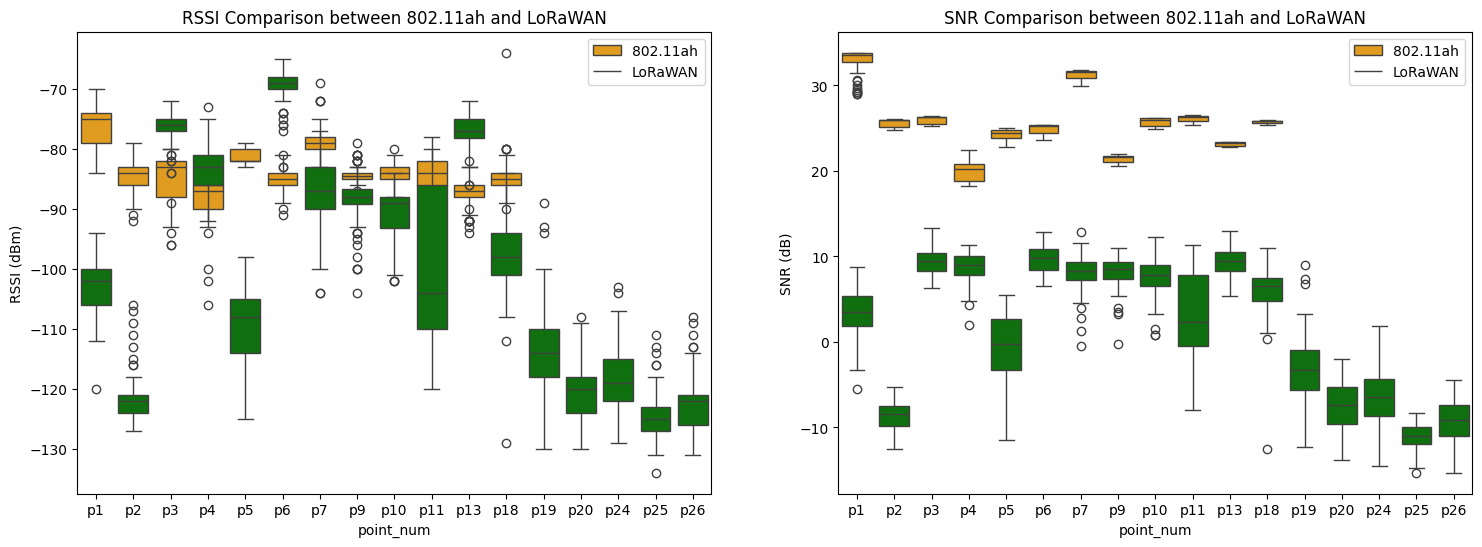

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# rssi 비교 - boxplot
sns.boxplot(data=df_ah_rssi, color='orange', ax=axes[0])
sns.boxplot(data=df_lora_rssi, color='green', ax=axes[0])

# X축, Y축 라벨 및 제목 추가
axes[0].set_xlabel('point_num')
axes[0].set_ylabel('RSSI (dBm)')
axes[0].set_title('RSSI Comparison between 802.11ah and LoRaWAN')
axes[0].legend(['802.11ah', 'LoRaWAN'], loc='upper right')

# snr 비교 - boxplot
sns.boxplot(data=df_ah_snr, color='orange', ax=axes[1])
sns.boxplot(data=df_lora_snr, color='green', ax=axes[1])

# X축, Y축 라벨 및 제목 추가
axes[1].set_xlabel('point_num')
axes[1].set_ylabel('SNR (dB)')
axes[1].set_title('SNR Comparison between 802.11ah and LoRaWAN')
axes[1].legend(['802.11ah', 'LoRaWAN'], loc='upper right')

plt.show()

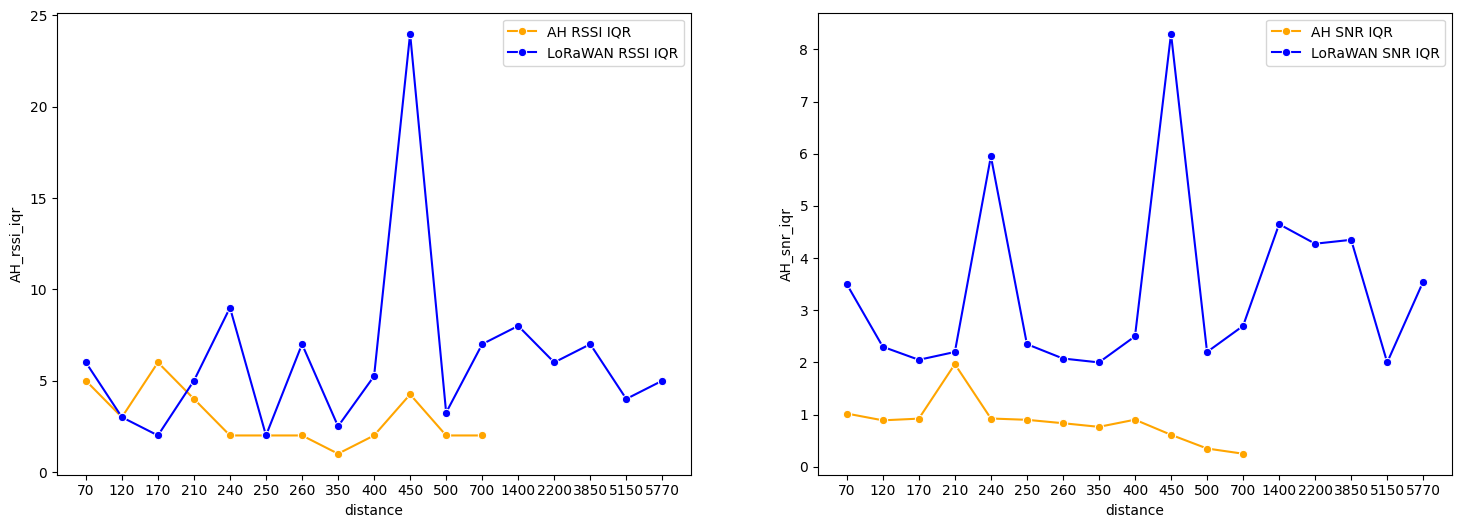

In [ ]:
#IQR값
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

dat['distance'] = dat['distance'].astype(str)

sns.lineplot(x='distance', y='AH_rssi_iqr', data=dat, label='AH RSSI IQR', marker='o', color='orange', ax=axes[0])
sns.lineplot(x='distance', y='LoRa_rssi_iqr', data=dat, label='LoRaWAN RSSI IQR', marker='o', color='blue', ax=axes[0])

sns.lineplot(x='distance', y='AH_snr_iqr', data=dat, label='AH SNR IQR', marker='o', color='orange', ax=axes[1])
sns.lineplot(x='distance', y='LoRa_snr_iqr', data=dat, label='LoRaWAN SNR IQR', marker='o', color='blue', ax=axes[1])

plt.show()


### **안정성 및 성능의 변동성**

AH : 더 작은 IQR 값으로 인해 신호 강도 및 신호 품질에서 더 안정적이다.
LoRa : 더 큰 IQR 값으로 인해 신호 강도 및 신호 품질에서 변동성이 크다. (불안정함)


AH는 안정적인 성능을 제공하며, 예측 가능성이 높다.
BUT, LoRa는 변동성이 크기 때문에, 신뢰성 측면에서 불리할 수 있다. -> 서비스 품질(QoS)에 영향

## **Communication Range(distance to GW)에 따른 성능 비교**

<ipython-input-70-17fdc84fbcad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comparison_iqr['distance'] = df_comparison_iqr['distance'].astype(str)


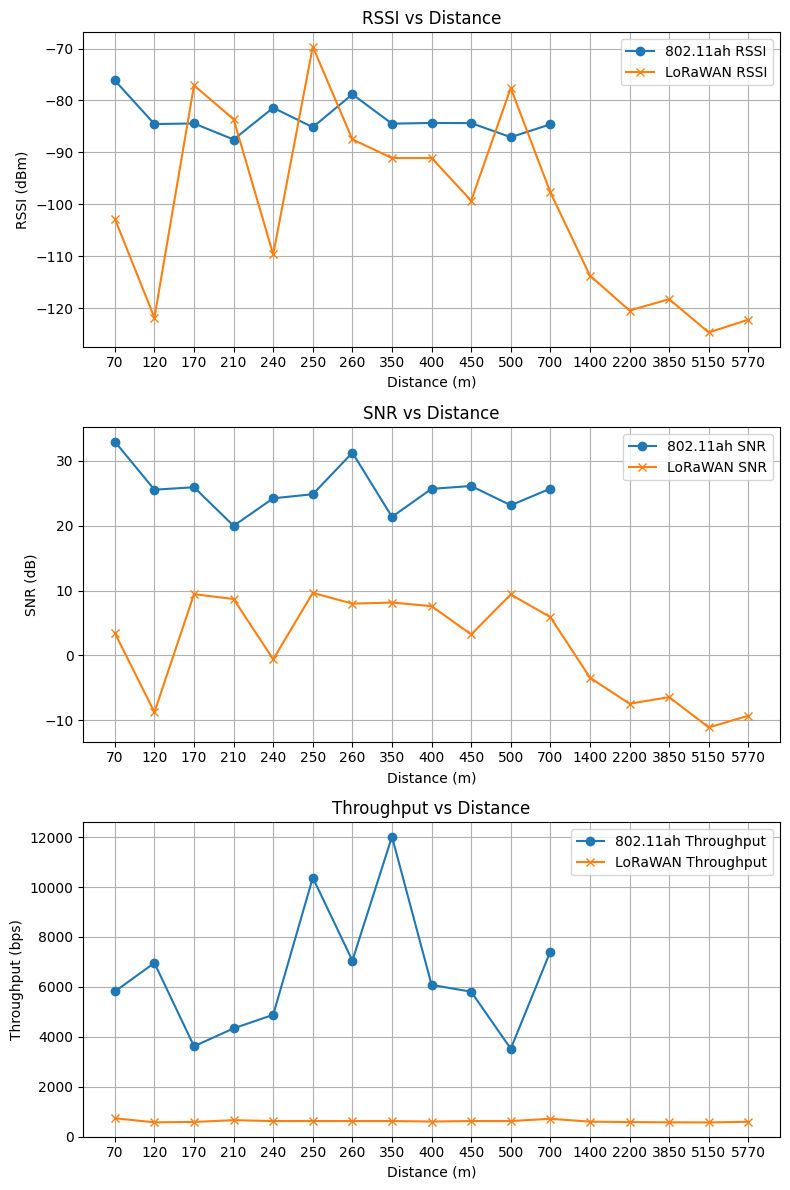

In [ ]:
columns_with_iqr = ['distance', 'AH_rssi_mean', 'AH_rssi_iqr', 'AH_snr_mean', 'AH_snr_iqr', 'AH_put', 'LoRa_rssi_mean', 'LoRa_rssi_iqr', 'LoRa_snr_mean', 'LoRa_snr_iqr', 'LoRa_put']
df_comparison_iqr = dat[columns_with_iqr]
df_comparison_iqr['distance'] = df_comparison_iqr['distance'].astype(str)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# RSSI
axes[0].plot(df_comparison_iqr['distance'], df_comparison_iqr['AH_rssi_mean'], label='802.11ah RSSI', marker='o')
axes[0].plot(df_comparison_iqr['distance'], df_comparison_iqr['LoRa_rssi_mean'], label='LoRaWAN RSSI', marker='x')
axes[0].set_title('RSSI vs Distance')
axes[0].set_xlabel('Distance (m)')
axes[0].set_ylabel('RSSI (dBm)')
axes[0].legend()
axes[0].grid(True)

# SNR
axes[1].plot(df_comparison_iqr['distance'], df_comparison_iqr['AH_snr_mean'], label='802.11ah SNR', marker='o')
axes[1].plot(df_comparison_iqr['distance'], df_comparison_iqr['LoRa_snr_mean'], label='LoRaWAN SNR', marker='x')
axes[1].set_title('SNR vs Distance')
axes[1].set_xlabel('Distance (m)')
axes[1].set_ylabel('SNR (dB)')
axes[1].legend()
axes[1].grid(True)

# Throughput
axes[2].plot(df_comparison_iqr['distance'], df_comparison_iqr['AH_put'], label='802.11ah Throughput', marker='o')
axes[2].plot(df_comparison_iqr['distance'], df_comparison_iqr['LoRa_put'], label='LoRaWAN Throughput', marker='x')
axes[2].set_title('Throughput vs Distance')
axes[2].set_xlabel('Distance (m)')
axes[2].set_ylabel('Throughput (bps)')
axes[2].legend()
axes[2].grid(True)


plt.tight_layout()
plt.show()


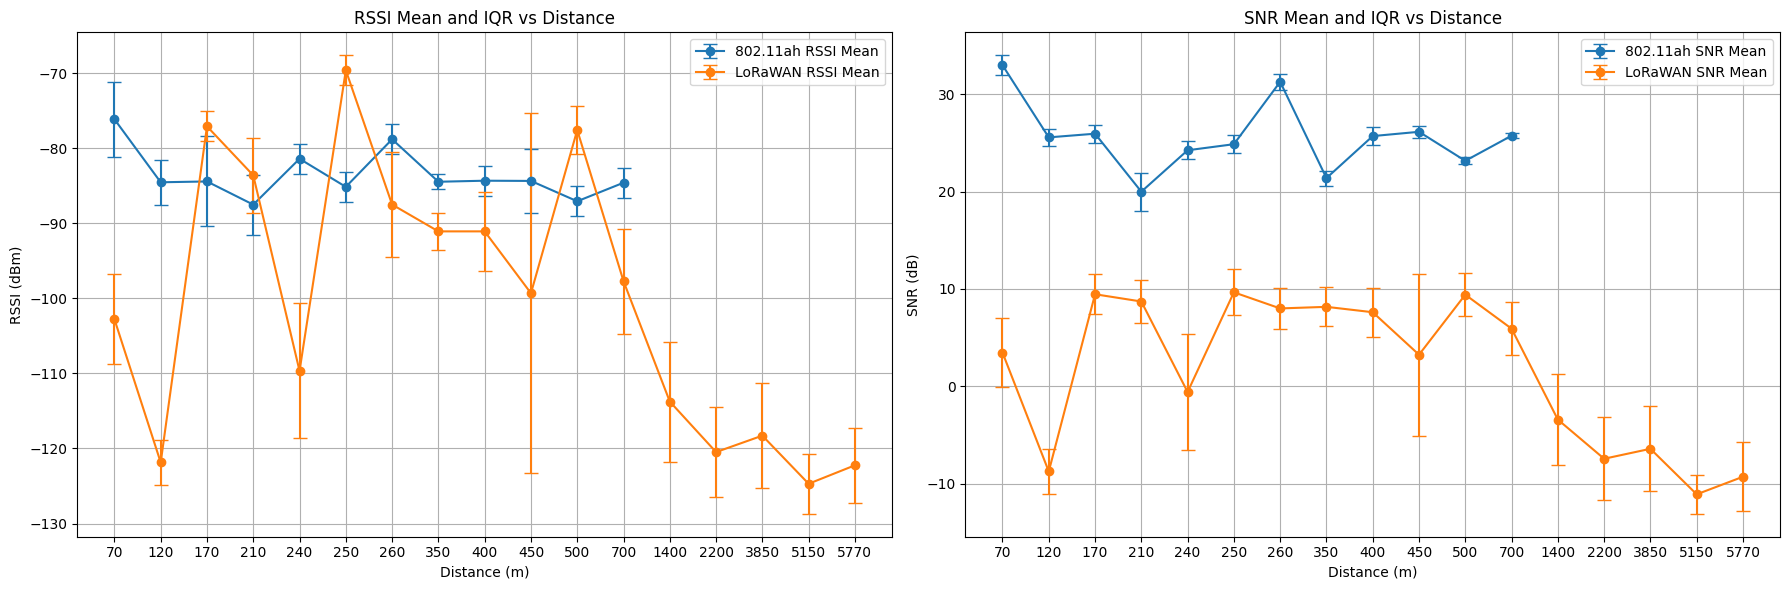

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# RSSI with IQR
axes[0].errorbar(df_comparison_iqr['distance'], df_comparison_iqr['AH_rssi_mean'], yerr=df_comparison_iqr['AH_rssi_iqr'], label='802.11ah RSSI Mean', fmt='-o', capsize=5)
axes[0].errorbar(df_comparison_iqr['distance'], df_comparison_iqr['LoRa_rssi_mean'], yerr=df_comparison_iqr['LoRa_rssi_iqr'], label='LoRaWAN RSSI Mean', fmt='-o', capsize=5)
axes[0].set_title('RSSI Mean and IQR vs Distance')
axes[0].set_xlabel('Distance (m)')
axes[0].set_ylabel('RSSI (dBm)')
axes[0].legend()
axes[0].grid(True)

# SNR with IQR
axes[1].errorbar(df_comparison_iqr['distance'], df_comparison_iqr['AH_snr_mean'], yerr=df_comparison_iqr['AH_snr_iqr'], label='802.11ah SNR Mean', fmt='-o', capsize=5)
axes[1].errorbar(df_comparison_iqr['distance'], df_comparison_iqr['LoRa_snr_mean'], yerr=df_comparison_iqr['LoRa_snr_iqr'], label='LoRaWAN SNR Mean', fmt='-o', capsize=5)
axes[1].set_title('SNR Mean and IQR vs Distance')
axes[1].set_xlabel('Distance (m)')
axes[1].set_ylabel('SNR (dB)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


- RSSI
802.11ah와 LoRa 모두 거리가 멀어질수록 RSSI가 감소하는 경향(크진 않음).

802.11ah는 전반적으로 더 높은 RSSI 값을 유지하는 반면, LoRa는 더 낮은 RSSI 값을 보인다.

LoRa의 경우, 700m까지 RSSI가 상당히 낮은 수준으로 유지되며 RSSI 값이 일정하지 않고 많은 변동을 보여주는 불안정한 RSSI값을 보여준다. 그 이후로는(1400m부터) 더 낮은 값을 보여준다.

802.11ah의 IQR(변동성)은 거리가 증가해도 비교적 일정한 패턴을 보여준다.그러나, LoRa의 IQR(변동성)은 위치에 따라 변동성 차이가 크고 170,250,500m인 위치에서는 LoRa의 RSSI가 802.11ah보다 높은 값을 보여준다. 여기서 LoRa는 주변환경 즉, Obstacle(Fresnel Obstruction)에 영향을 많이 받는다는 것을 의심해볼 수 있다.

- SNR
802.11ah와 LoRa 모두 거리가 멀어질수록 SNR이 감소하는 경향(얘도 도드라지진 않음).

802.11ah는 전반적으로 더 높은 SNR 값을 유지하며, LoRa는 더 낮은 SNR 값을 보인다.

LoRa의 경우, 700m까지 SNR 또한 상당히 낮은 수준으로 유지되며 SNR 값이 일정하지 않고 많은 변동을 보여주는 불안정한 SNR값을 보여준다. 그 이후로는(1400m부터) 더 낮은 값을 보여준다.

- Throughput
802.11ah가 LoRa보다 더 높은 Throughput 값을 유지한다. Throuput 흠.. 노답.

- 종합적인 분석
802.11ah는 더 나은 신호 강도와 품질을 제공하고 일관된 성능을 유지한다. 그러나 통신거리가 LoRaWAN에 비해 턱없이 짧다.

반면, LoRaWAN은 신호 강도와 품질이 낮으며 성능의 변동성이 크지만, 통신거리가 매우 길다.

802.11ah, LoRaWAN 둘 다 700m 내의 smart city area에서는 거리에 따른 성능이 크게 차이가 나지 않는다. 즉, 700m내에서는 거리가 802.11ah와 LoRaWAN의 성능에 영향을 크게 미치지 않는다. 그래도 **줄어드는 경향**이긴함.


# **상관분석 (변수들 간 선형적 관계가 있는지 없는지)**
여기서는 p18(700m) 까지의 데이터로만 분석

independent variable (LOS, fresnel zone obstruction%가 추가되기 때문)

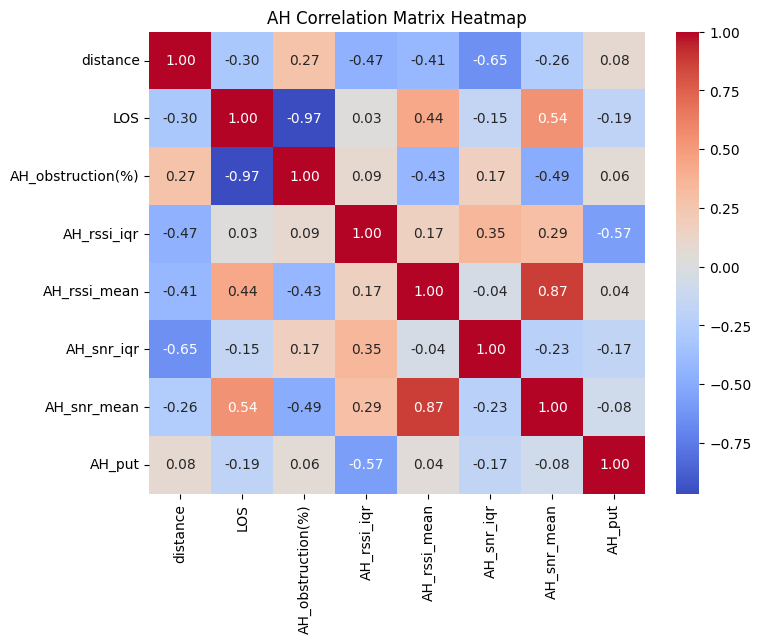

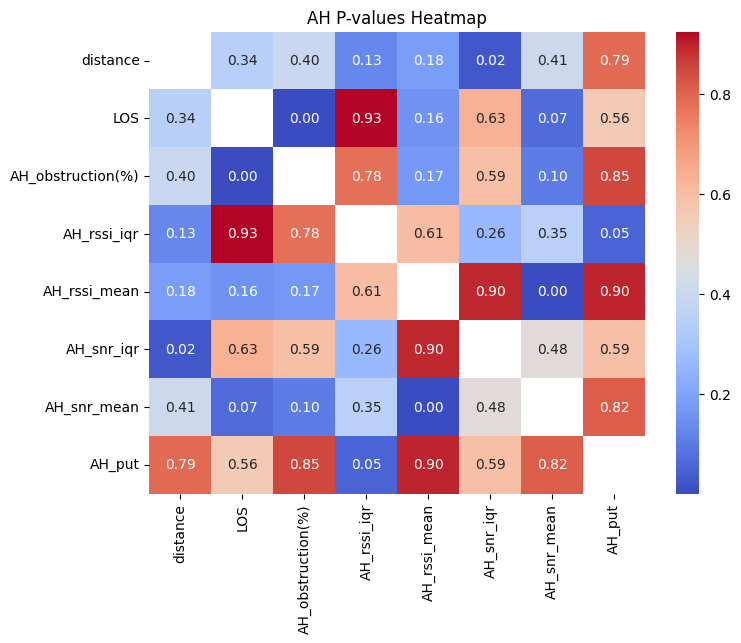

In [ ]:
#상관관계시각화 (절댓값이 0.3이상이면 의미있는 결과가 될 수 있음. 그러나 상관계수 자체만으로는 결론을 내리기 어렵다.)
data_without_num = data_ah.drop(data_ah.columns[0], axis=1) #문자열 데이터 제거
correlation_matrix = data_without_num.corr()

# p값 계산을 위한 함수
def calculate_p_values(df):
    p_values = pd.DataFrame(index=df.columns, columns=df.columns)
    for col in df.columns:
        for row in df.columns:
            if col != row:
                _, p_value = pearsonr(df[col], df[row])
                p_values.loc[row, col] = p_value
            else:
                p_values.loc[row, col] = np.nan  # 같은 변수끼리의 상관 관계는 고려하지 않음
    return p_values

# p값 계산
p_values = calculate_p_values(data_without_num)

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('AH Correlation Matrix Heatmap') #상관행렬
plt.show()

# p값 히트맵 시각화
plt.figure(figsize=(8,6))
sns.heatmap(p_values.astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('AH P-values Heatmap') # p값 히트맵
plt.show()

상관계수의 절댓값이 0.3 이상이면 분석요망

### **AH 상관관계분석**

- distance는 AH의 모든 성능 지표와 음의 상관관계(-)를 가지며, 거리가 멀어질수록 성능이 저하되는 경향을 보인다. 이는 거리가 멀어질수록 RSSI와 SNR이 감소함을 의미한다.

- LOS는 AH 성능 지표와 양의 상관관계(+)를 가지며, LOS가 있을 때 성능이 향상되는 경향을 보인다.
  - LOS 와 AH_rssi_mean의 상관계수 r = 0.44 (p = 0.16)
  - LOS 와 AH_snr_mean의 상관계수 r = 0.54 (p = 0.07)

- AH_obstruction은 AH 성능 지표와 음의 상관관계(-)를 가지며, AH_obstruction %가 높을수록 성능은 저하되는 경향을 보인다.
  - AH_obstruction 와 AH_rssi_mean 의 상관계수 r = -0.43 (p = 0.17)
  - AH_obstruction 와 AH_snr_mean 의 상관계수 r -0.49 (p = 0.10)



결론 : AH는 거리가 멀어질수록 성능이 조금 저하되고, obstruction에 약한것을 볼 수 있다.

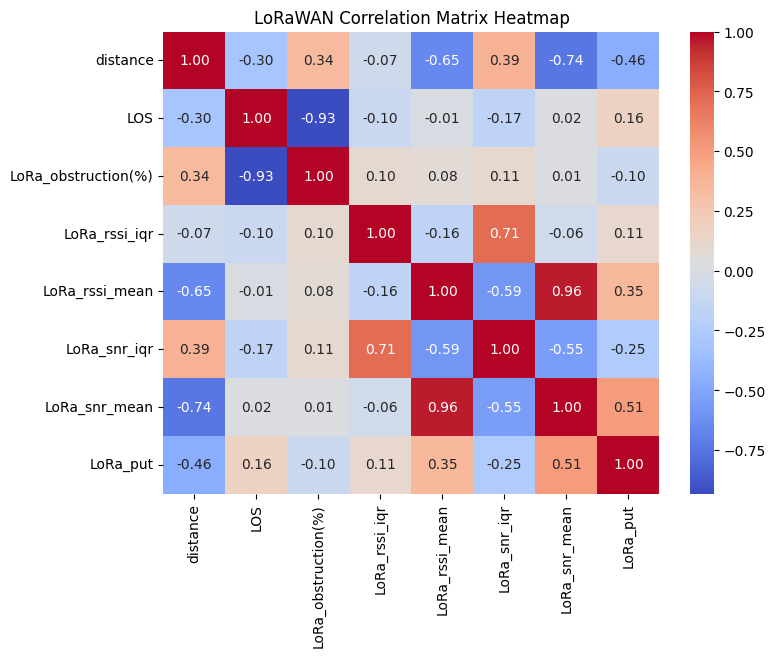

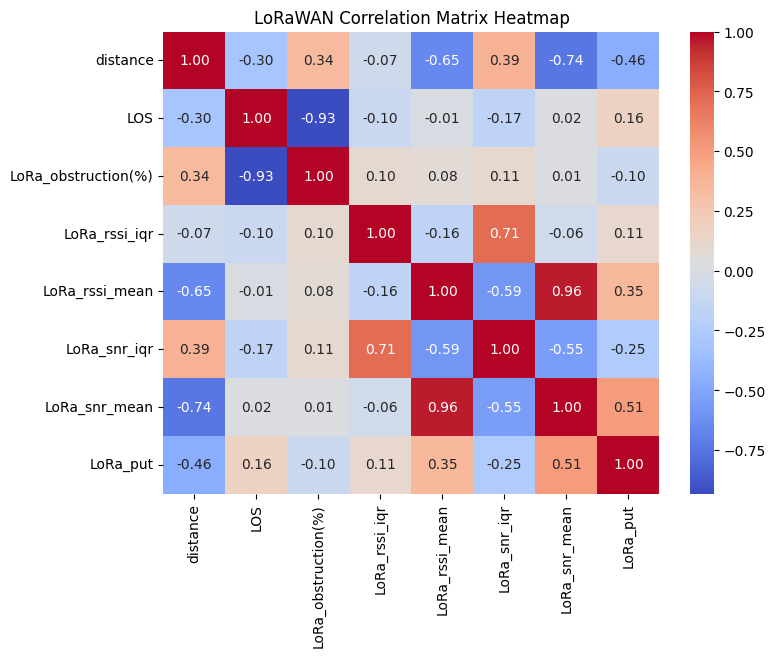

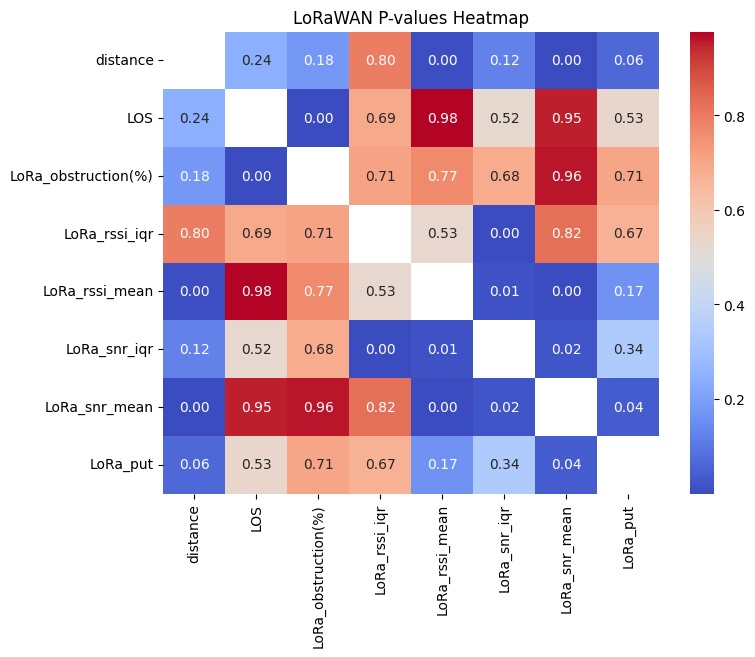

In [ ]:
data_without_num2 = data_lora.drop(data_lora.columns[0], axis=1) #문자열 데이터 제거
correlation_matrix2 = data_without_num2.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('LoRaWAN Correlation Matrix Heatmap') #상관행렬
plt.show()

# p값 계산
p_values2 = calculate_p_values(data_without_num2)

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('LoRaWAN Correlation Matrix Heatmap') #상관행렬
plt.show()

# p값 히트맵 시각화
plt.figure(figsize=(8,6))
sns.heatmap(p_values2.astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('LoRaWAN P-values Heatmap') # p값 히트맵
plt.show()

### **LoRa 상관관계분석**

- distance는 LoRa 성능 지표와 전체적으로 매우 강한 음의 상관관계(-)를 가진다. 또한, Throughput 역시 거리가 증가함에 따라 감소하는 경향을 보인다.
  - distance 와 LoRa_rssi_mean의 상관계수 r = -0.641 (p = 0.00)
  - distance 와 LoRa_snr_mean의 상관계수 r = -0.728 (p = 0.00)
  - distance 와 Lora_put의 상관계수 r = -0.442 (p = 0.06)

- LOS, LoRa_obstruction은 LoRa의 성능에 거의 영향을 주지 않는다. 장애물의 존재가 LoRa 성능 지표에 미치는 영향은 매우 미미하다는 것을 알 수 있다.

결론 : LoRa는 distance가 멀어질수록 성능이 저하되며, LOS와 obstruction에 거의 영향을 받지 않는다.

# **회귀분석 - AH**

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
independent_vars_ah = ['distance', 'LOS', 'AH_obstruction(%)'] #독립변수
performance_metrics_ah = ['AH_rssi_iqr', 'AH_rssi_mean', 'AH_snr_iqr', 'AH_snr_mean', 'AH_put'] #종속변수

X_ah = data_without_num[independent_vars_ah]

#회귀분석
def get_regression_results(X, y):
    X_with_const = sm.add_constant(X)
    model = sm.OLS(y, X_with_const).fit()
    return {
        'summary': model.summary(),
        'coefficients': model.params,
        'p_values': model.pvalues,
        'r_squared': model.rsquared,
        'adj_r_squared': model.rsquared_adj
    }

detailed_regression_results_ah = {}
for metric in performance_metrics_ah:
    y_ah = data_without_num[metric]
    detailed_regression_results_ah[metric] = get_regression_results(X_ah, y_ah)

for metric, results in detailed_regression_results_ah.items():
    print(f"Regression results for {metric}:")
    print("Summary:")
    print(results['summary'])
    print("\nCoefficients:")
    print(results['coefficients'])
    print("\nP-values:")
    print(results['p_values'])
    print("\nR-squared:")
    print(results['r_squared'])
    print("\nAdjusted R-squared:")
    print(results['adj_r_squared'])
    print("\n\n")

Regression results for AH_rssi_iqr:
Summary:
                            OLS Regression Results                            
Dep. Variable:            AH_rssi_iqr   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     1.887
Date:                Tue, 18 Jun 2024   Prob (F-statistic):              0.210
Time:                        11:14:07   Log-Likelihood:                -18.343
No. Observations:                  12   AIC:                             44.69
Df Residuals:                       8   BIC:                             46.62
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=1

**p-value가 0.05보다 작으면 유의미함.**

- 독립변수들  * AH_snr_iqr

p-value : 0.016 거리가 증가할수록 AH_snr_iqr이 유의미하게 감소합니다.

# **회귀분석 - LoRa**

In [ ]:
independent_vars_lora = ['distance', 'LOS', 'LoRa_obstruction(%)']
performance_metrics_lora = ['LoRa_rssi_iqr', 'LoRa_rssi_mean', 'LoRa_snr_iqr', 'LoRa_snr_mean', 'LoRa_put']

X_lora = data_without_num2[independent_vars_lora]

#회귀분석
def get_regression_results(X, y):
    X_with_const = sm.add_constant(X)
    model = sm.OLS(y, X_with_const).fit()
    return {
        'summary': model.summary(),
        'coefficients': model.params,
        'p_values': model.pvalues,
        'r_squared': model.rsquared,
        'adj_r_squared': model.rsquared_adj
    }

detailed_regression_results_lora = {}
for metric in performance_metrics_lora:
    y_lora = data_without_num2[metric]
    detailed_regression_results_lora[metric] = get_regression_results(X_lora, y_lora)

for metric, results in detailed_regression_results_lora.items():
    print(f"Regression results for {metric}:")
    print("Summary:")
    print(results['summary'])
    print("\nCoefficients:")
    print(results['coefficients'])
    print("\nP-values:")
    print(results['p_values'])
    print("\nR-squared:")
    print(results['r_squared'])
    print("\nAdjusted R-squared:")
    print(results['adj_r_squared'])
    print("\n\n")


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=1

Regression results for LoRa_rssi_iqr:
Summary:
                            OLS Regression Results                            
Dep. Variable:          LoRa_rssi_iqr   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                 -0.204
Method:                 Least Squares   F-statistic:                   0.09728
Date:                Tue, 18 Jun 2024   Prob (F-statistic):              0.960
Time:                        11:14:07   Log-Likelihood:                -50.914
No. Observations:                  17   AIC:                             109.8
Df Residuals:                      13   BIC:                             113.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

**p-value가 0.05보다 작으면 유의미함.**

- 독립변수들  * LoRa_rssi_mean

p-value : 0.002 거리가 증가할수록 RSSI 평균이 유의미하게 감소한다. 거리가 멀어질수록 신호 강도가 약해짐을 보여준다.

- 독립변수들 * LoRa_snr_mean

p-value : 0.0005 거리가 증가할수록 SNR 평균이 유의미하게 감소한다. 거리가 멀어질수록 신호 대 잡음비가 낮아짐을 보여준다.

# **결론**
AH : distance가 멀어질수록 성능이 조금 저하되고, obstruction에 약한것을 볼 수 있다. communication range가 lora에 비해 매우 짧다.

LoRa : distance가 멀어질수록 성능이 저하되며, LOS와 obstruction에 거의 영향을 받지 않는다. obstruction에 매우 강하다. communication range가 정말 길다.


- Commmunication Range ( AH < LoRa )

- obstruction 에 강함 ( AH < LoRa )

그러나, obstruction이 없는 곳에서는 AH > LoRa

- 네트워크 안정성 ( AH > LoRa )

AH의 신뢰성이 더 높다.

.

.

즉, 장애물이 없는 곳에서는 AH의 성능이 LoRa보다 전체적으로 매우 좋다(비교도 안될만큼). AH의 통신은 안정적인 반면에, LoRa는 불안정한 통신을 보여준다.
통신거리는 LoRa가 훨씬 길다. 장애물이 많은 곳에서는 LoRa의 성능이 급상승한다.


### **obstruction에 따른 rssi 인데 안쓸듯. 너무 dataset이 tiny 이슈..**

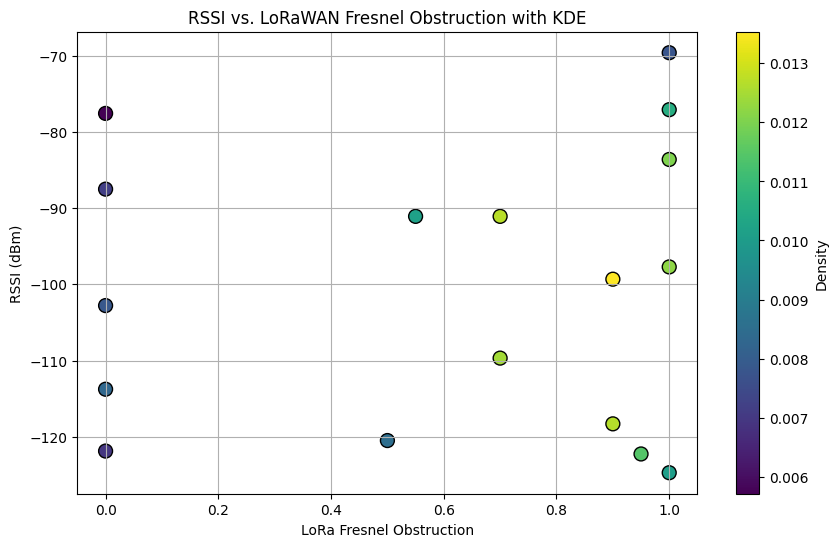

In [ ]:
from scipy.stats import gaussian_kde

# Generate a smaller sample of data
np.random.seed(0)
lora_obstruction = data_lora['LoRa_obstruction(%)']
rssi = data_lora['LoRa_rssi_mean']

# Perform kernel density estimate
xy = np.vstack([lora_obstruction, rssi])
kde = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = kde.argsort()
fresnel_obstruction, rssi, kde = lora_obstruction[idx], rssi[idx], kde[idx]

plt.figure(figsize=(10, 6))
sc = plt.scatter(fresnel_obstruction, rssi, c=kde, s=100, edgecolor='black', cmap='viridis')
plt.colorbar(sc, label='Density')
plt.title('RSSI vs. LoRaWAN Fresnel Obstruction with KDE')
plt.xlabel('LoRa Fresnel Obstruction')
plt.ylabel('RSSI (dBm)')
plt.grid(True)
plt.show()


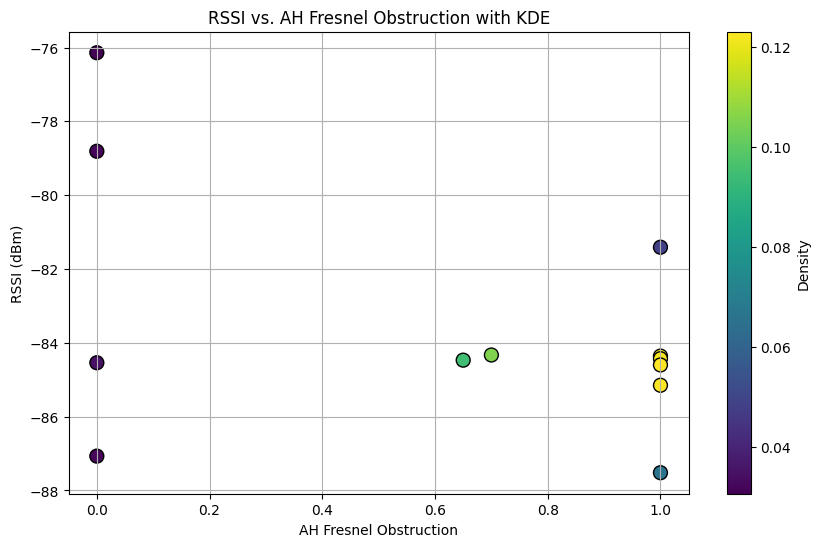

In [ ]:
# Generate a smaller sample of data
np.random.seed(0)
ah_obstruction = data_ah['AH_obstruction(%)']
rssi = data_ah['AH_rssi_mean']

# Perform kernel density estimate
xy = np.vstack([ah_obstruction, rssi])
kde = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = kde.argsort()
fresnel_obstruction, rssi, kde = ah_obstruction[idx], rssi[idx], kde[idx]

plt.figure(figsize=(10, 6))
sc = plt.scatter(fresnel_obstruction, rssi, c=kde, s=100, edgecolor='black', cmap='viridis')
plt.colorbar(sc, label='Density')
plt.title('RSSI vs. AH Fresnel Obstruction with KDE')
plt.xlabel('AH Fresnel Obstruction')
plt.ylabel('RSSI (dBm)')
plt.grid(True)
plt.show()
